<a href="https://colab.research.google.com/github/creepereye1204/TIL/blob/main/AI%20Data/Slice_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir WAVS

file_dir: /content
file_id: WAV.wav


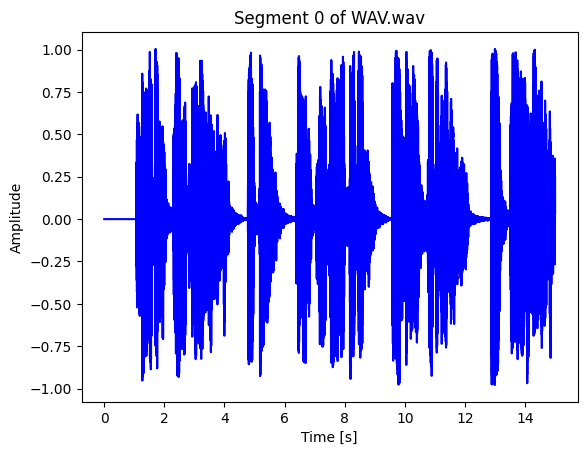

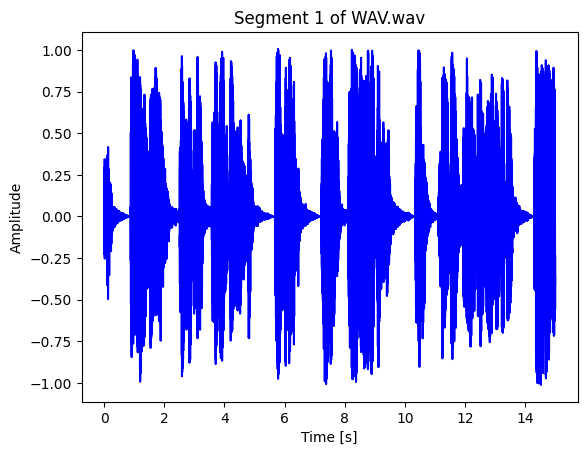

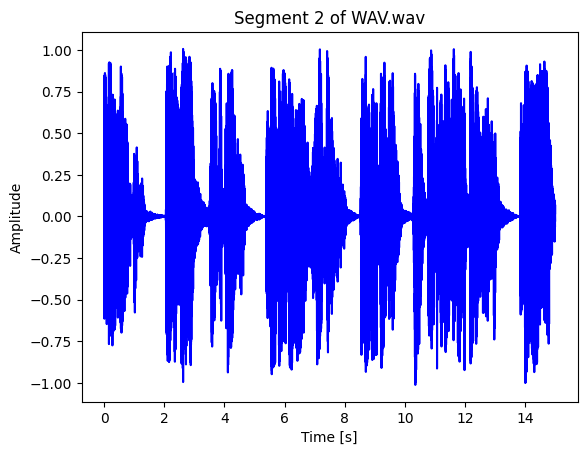

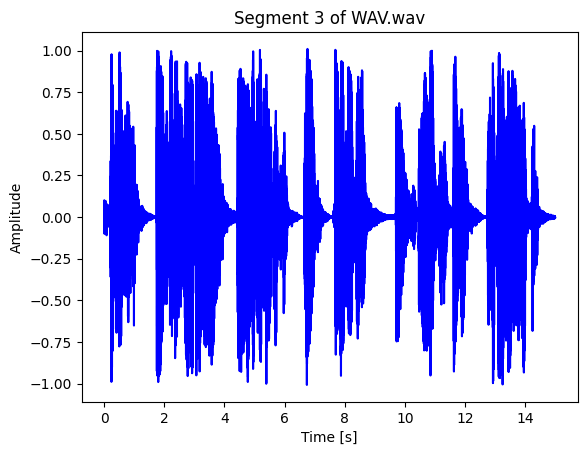

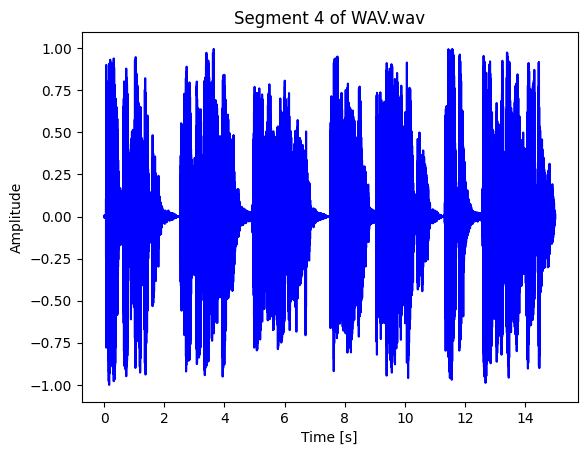

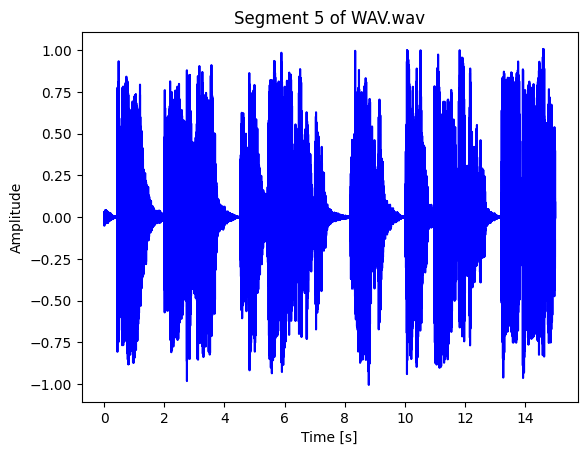

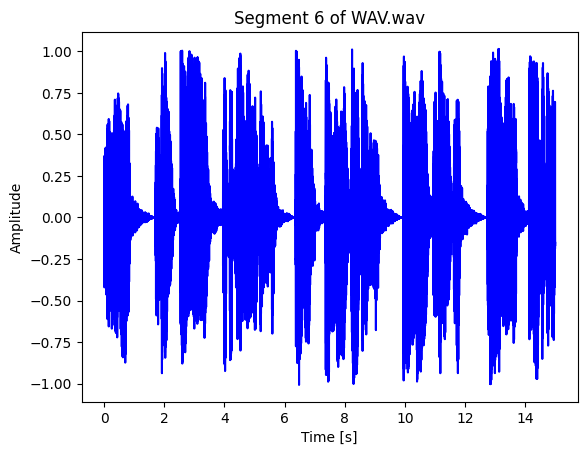

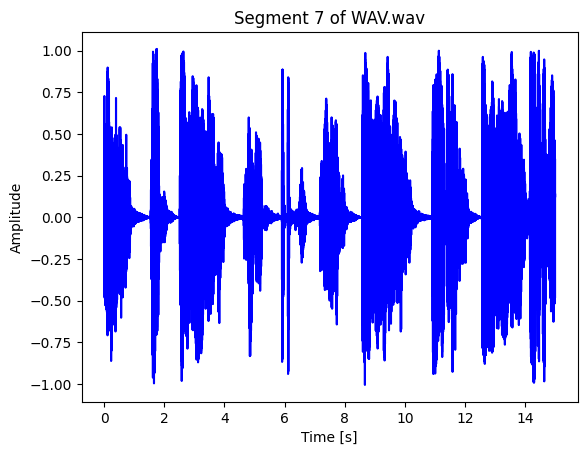

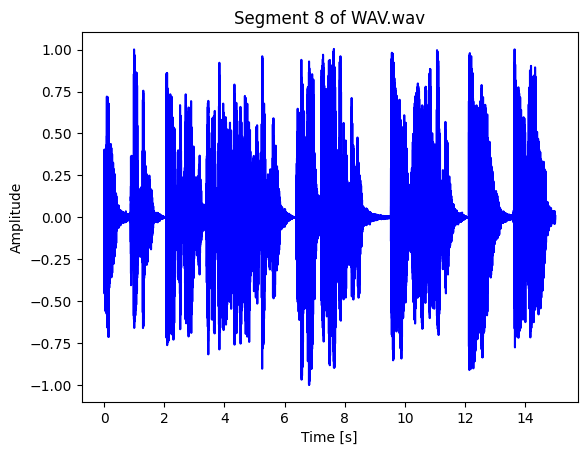

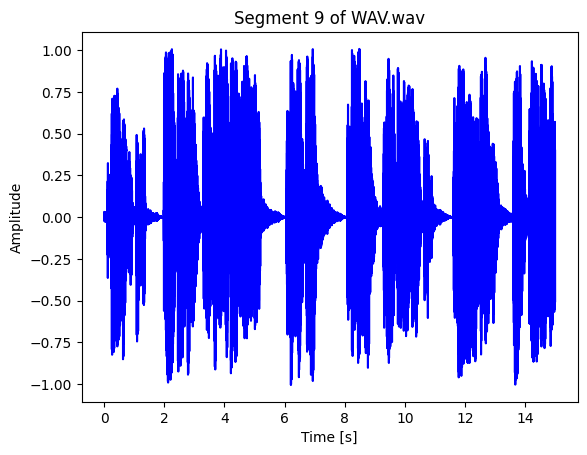

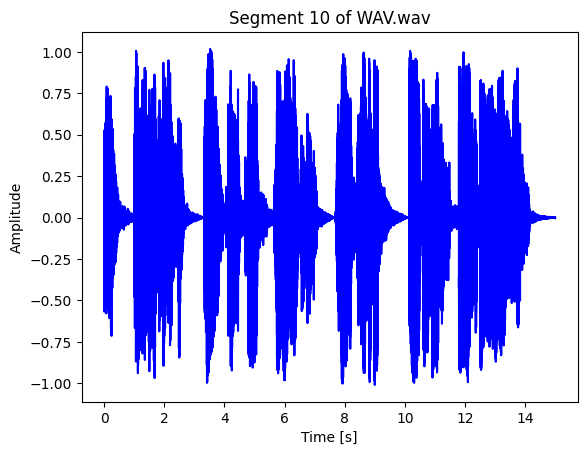

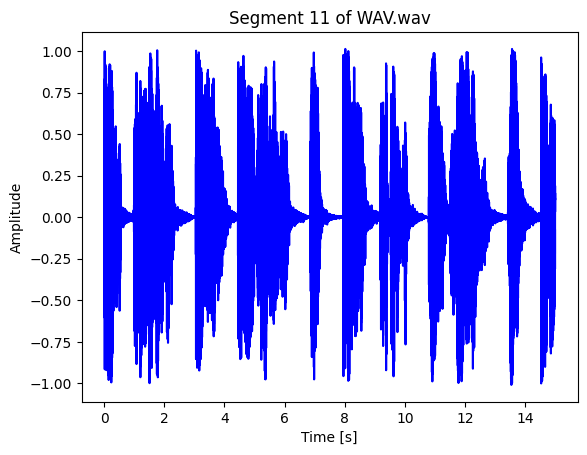

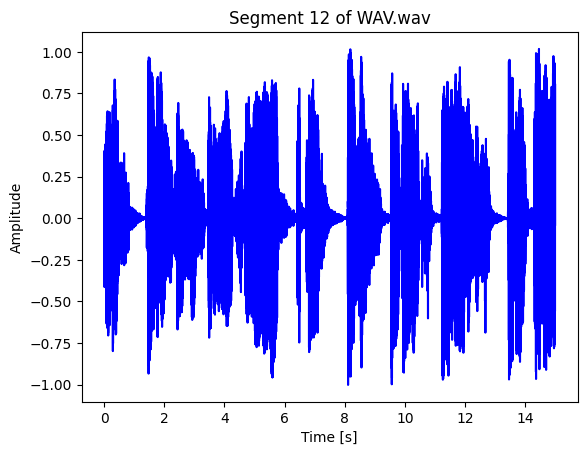

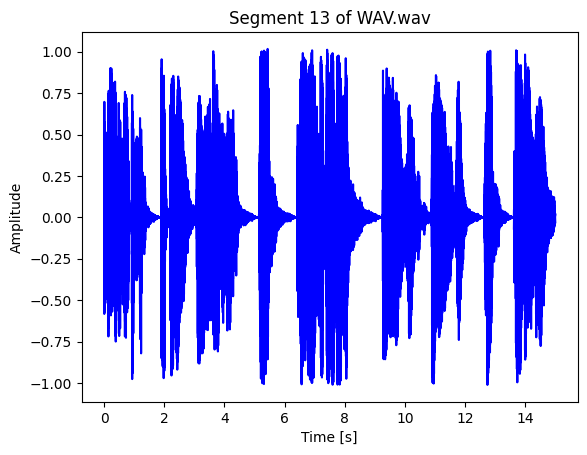

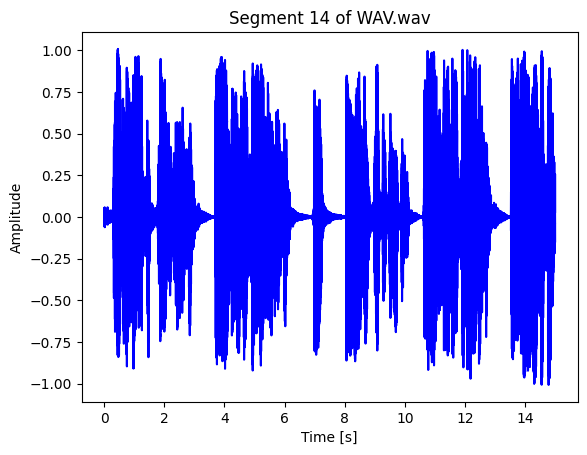

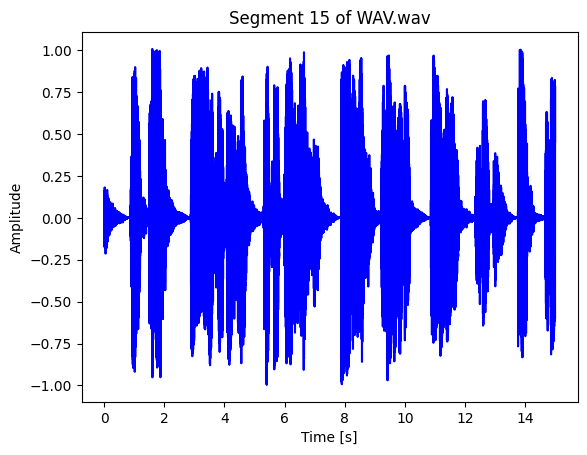

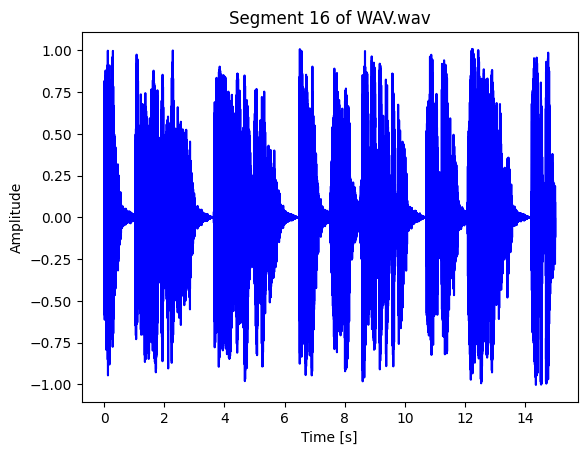

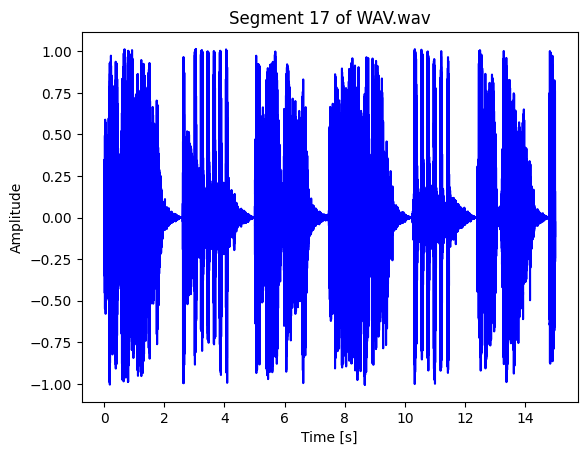

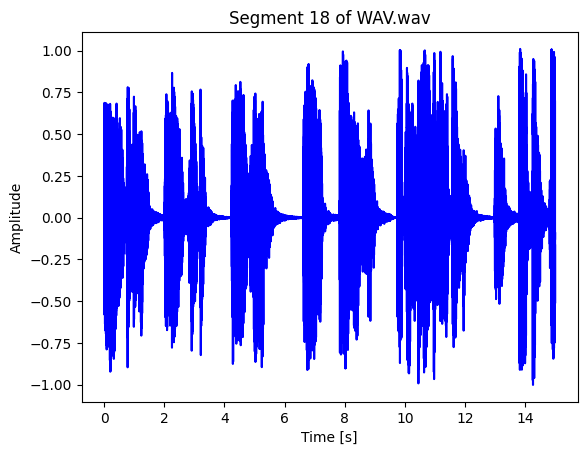

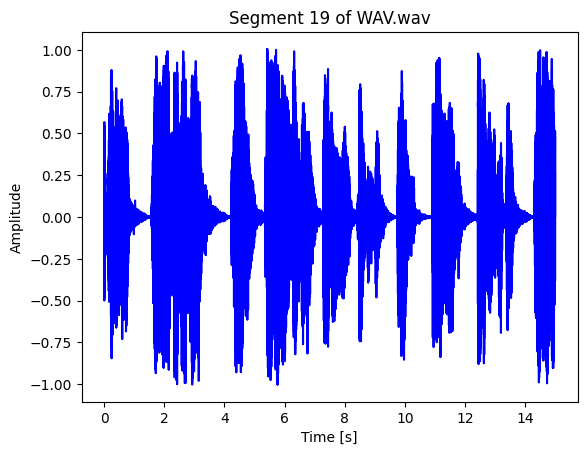

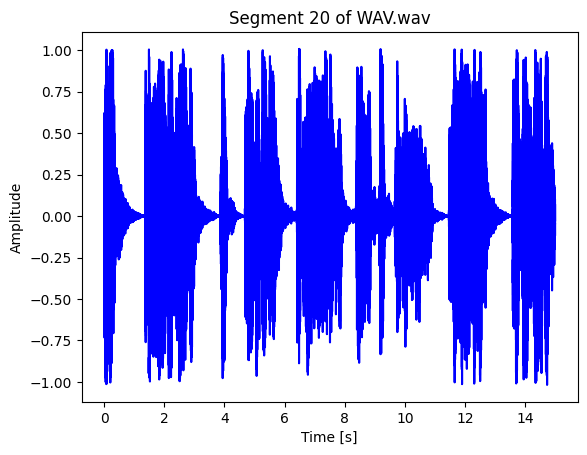

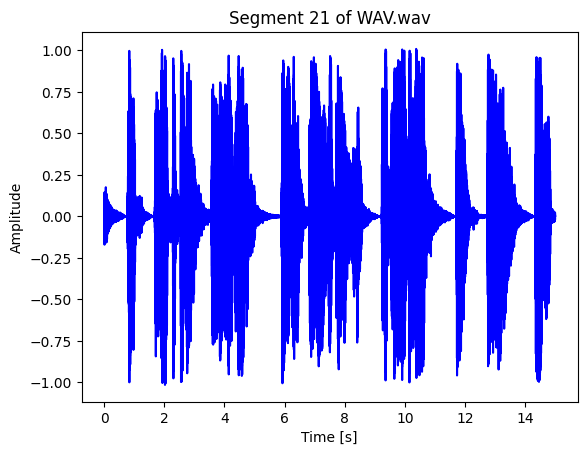

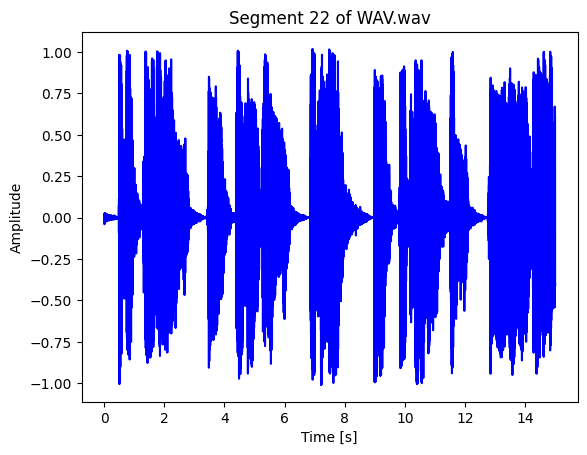

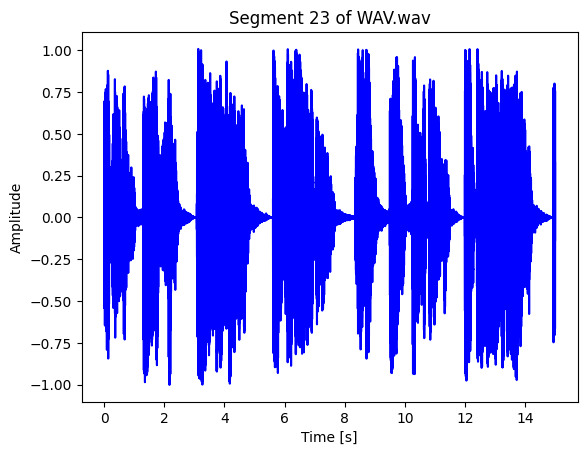

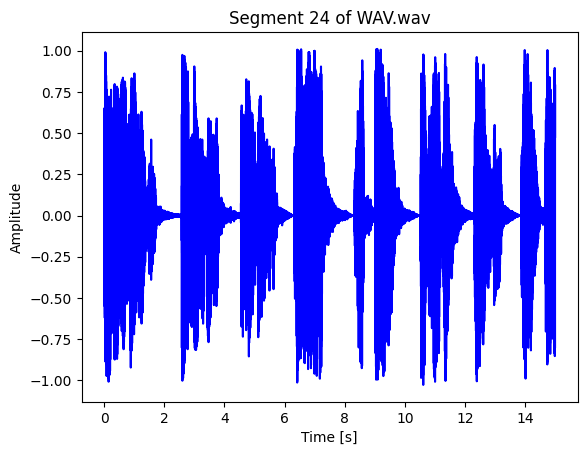

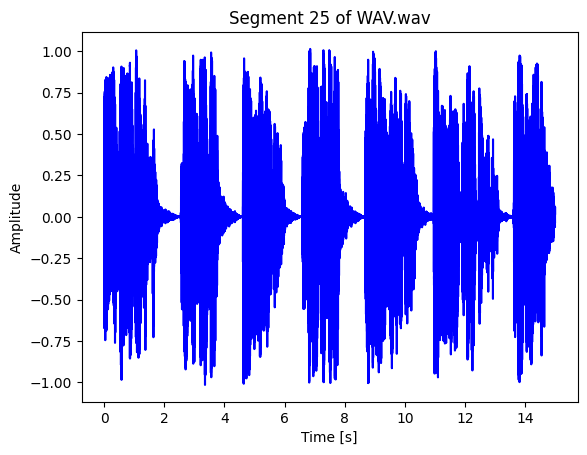

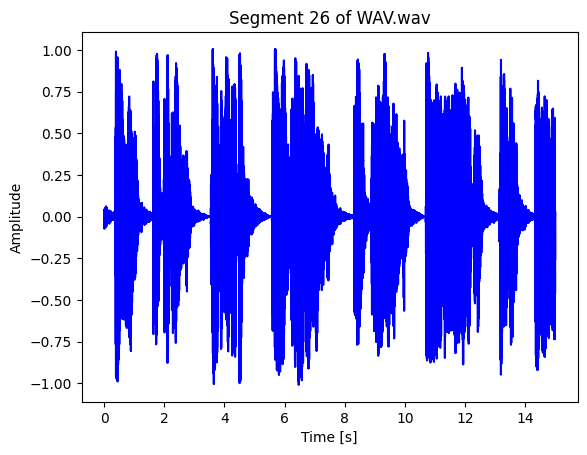

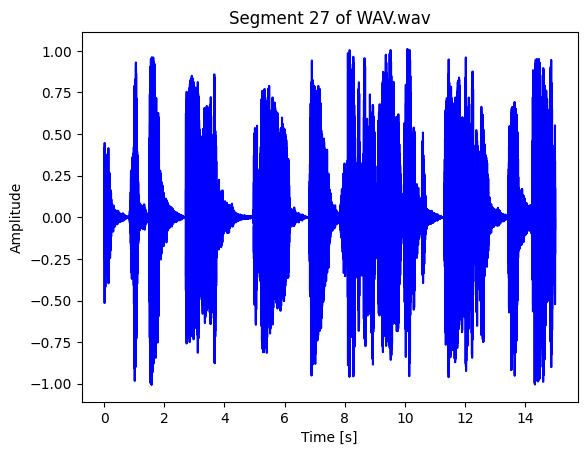

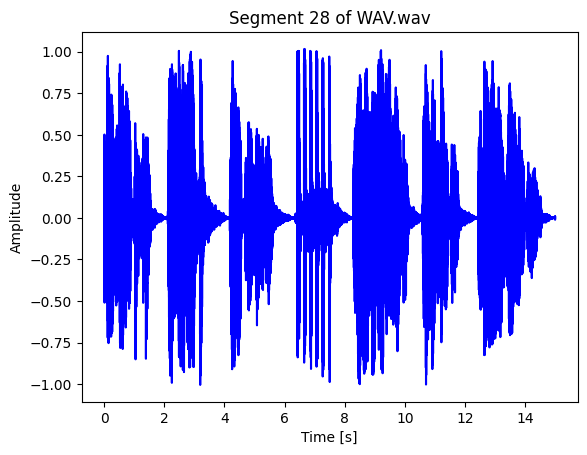

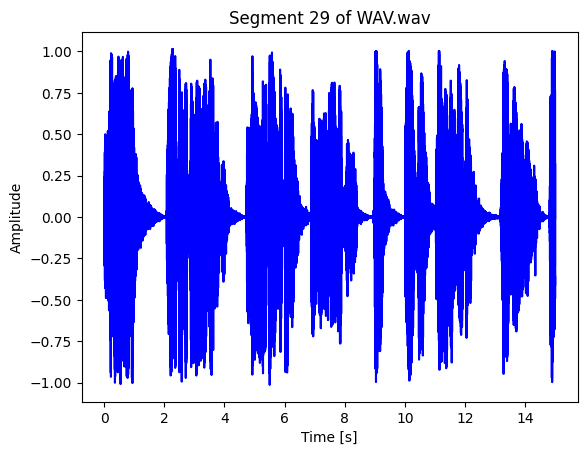

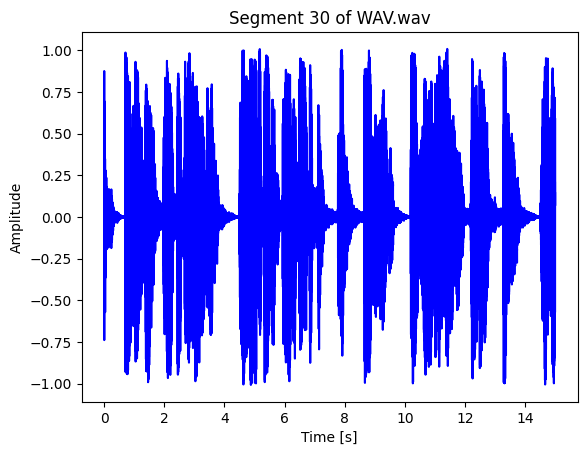

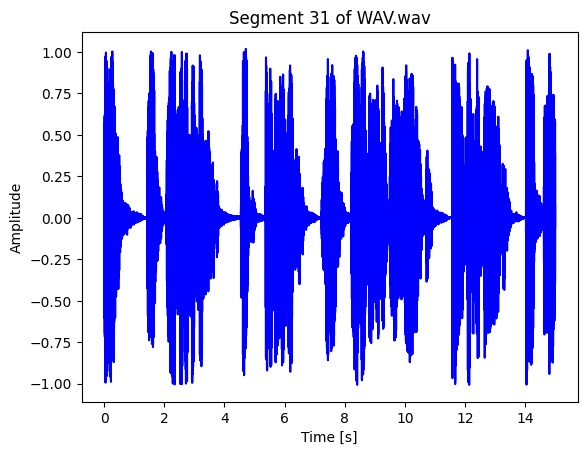

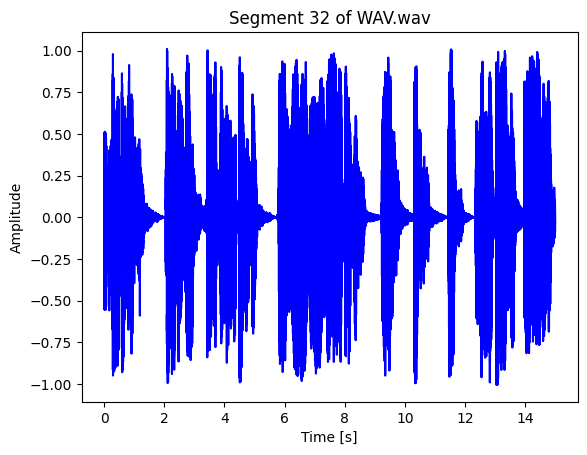

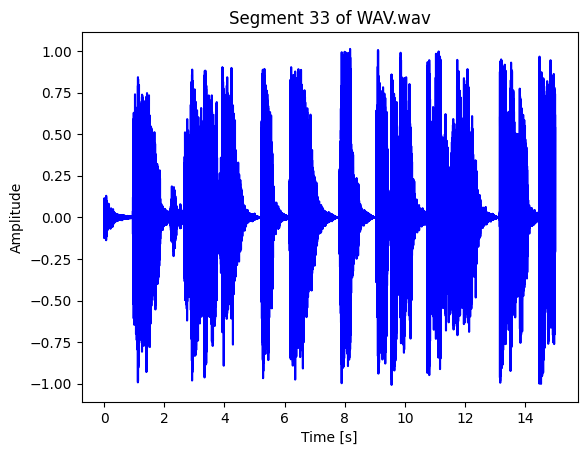

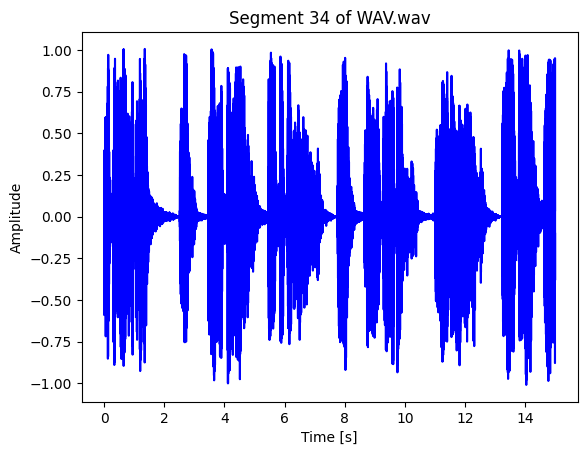

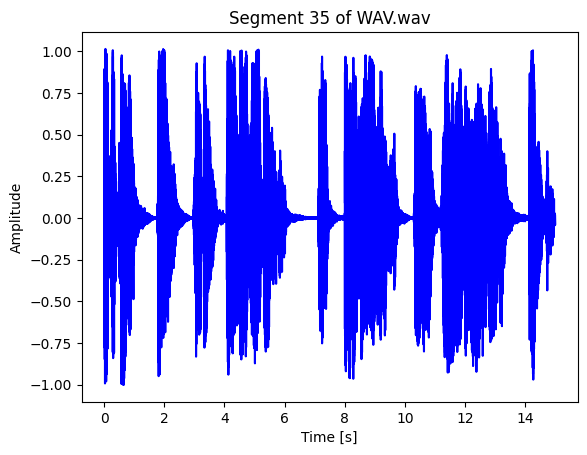

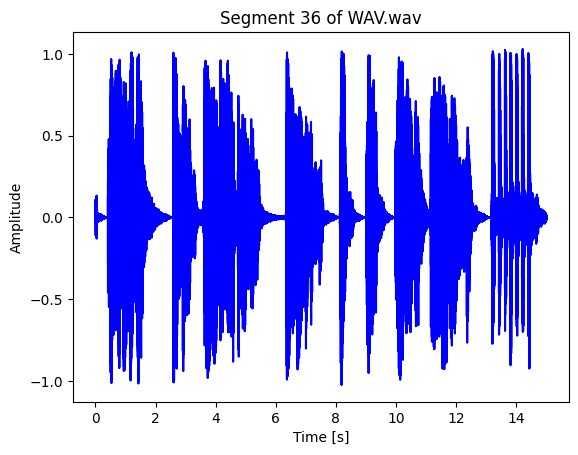

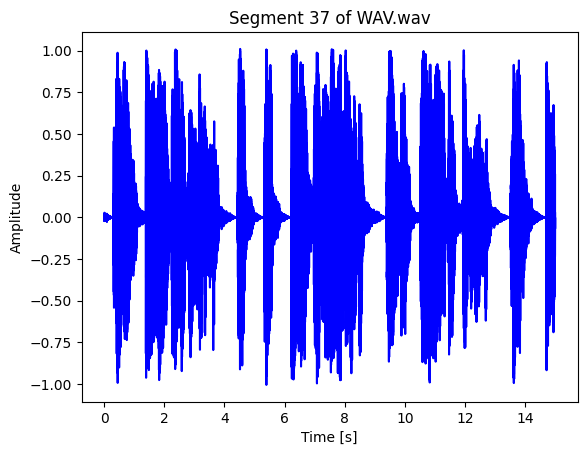

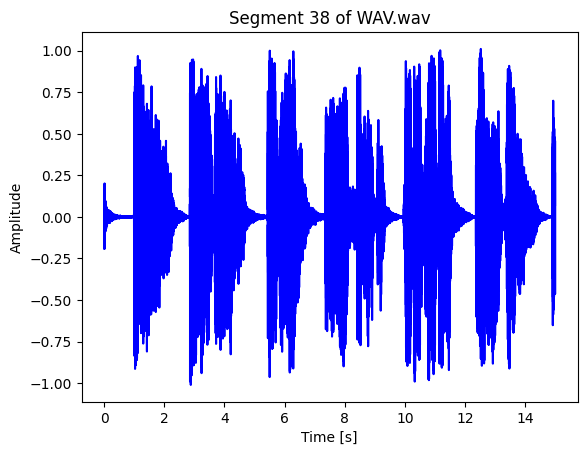

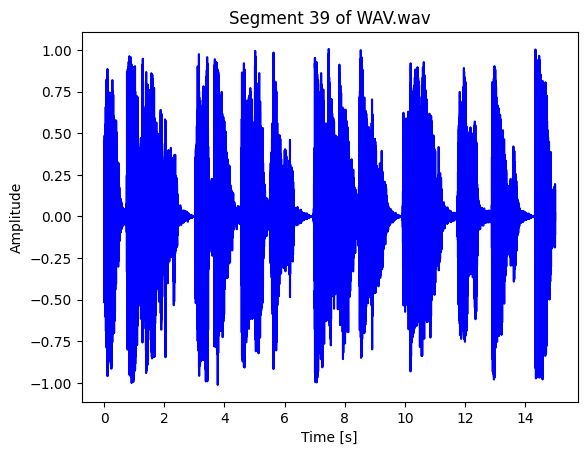

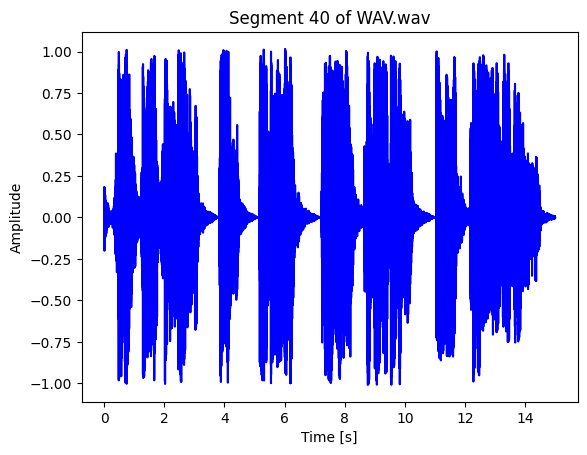

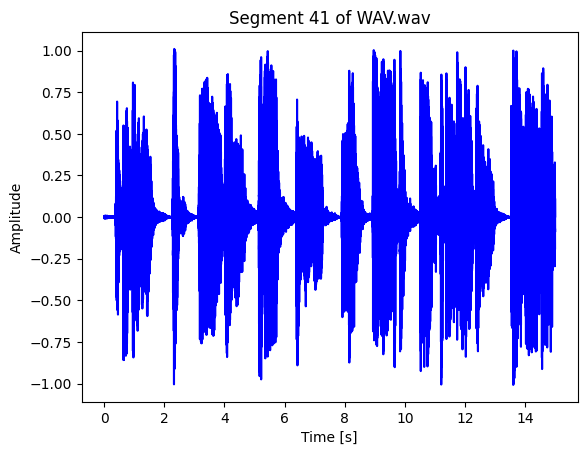

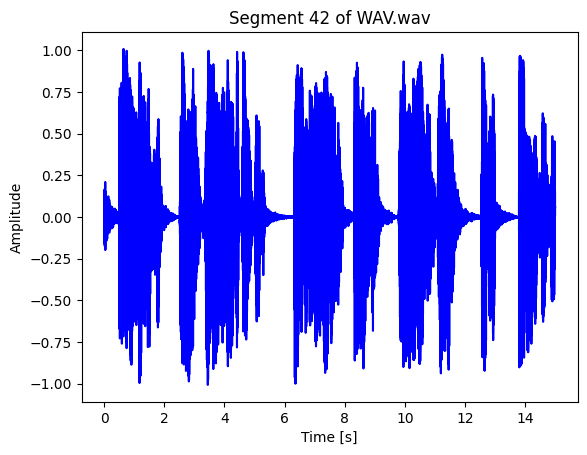

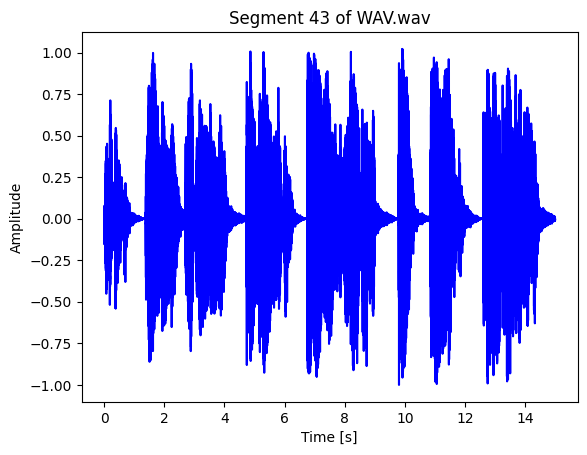

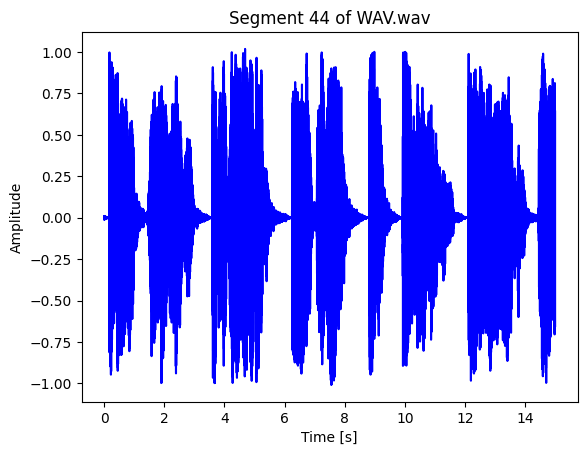

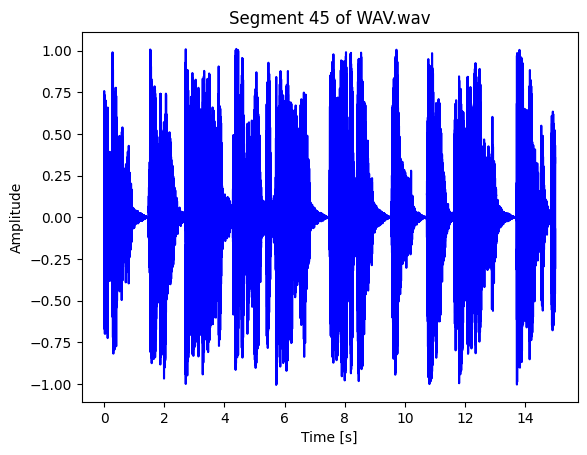

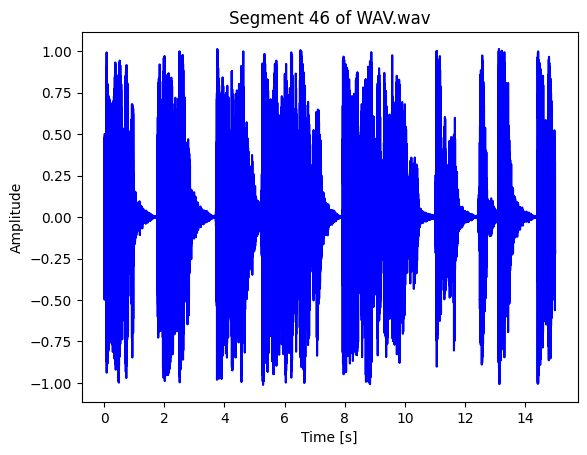

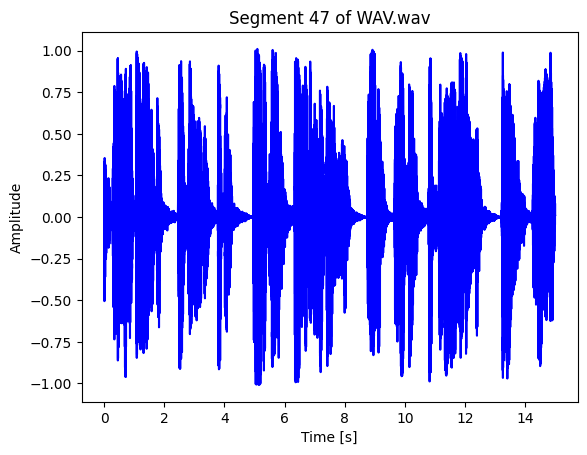

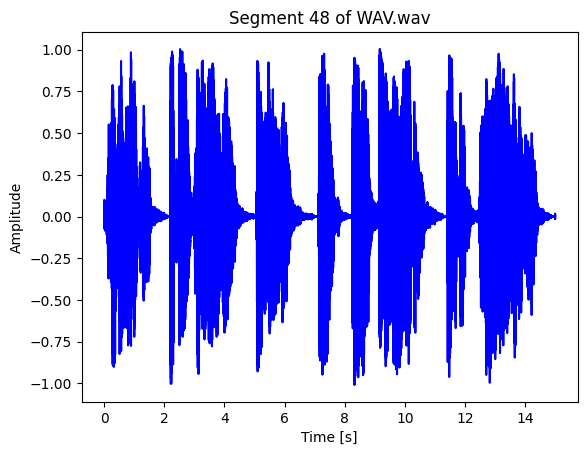

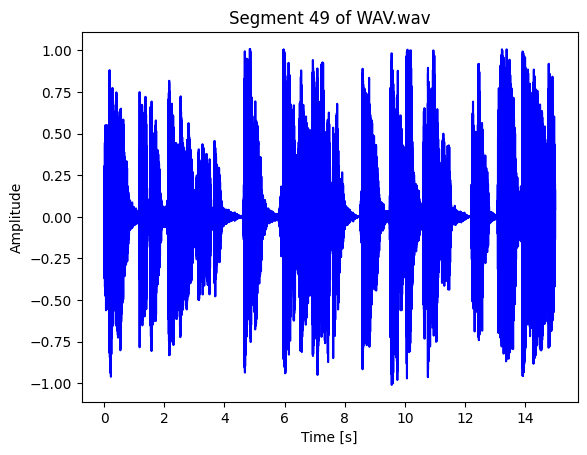

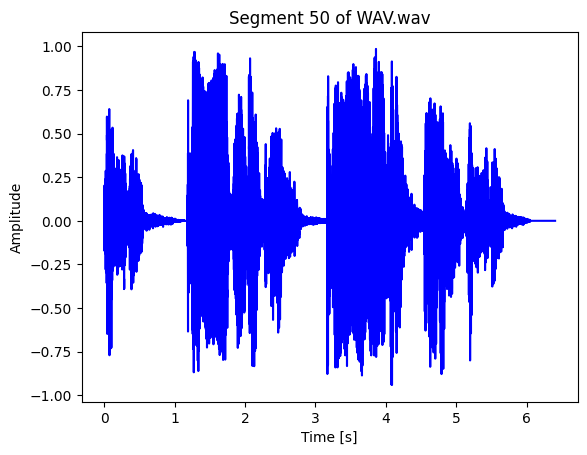

In [11]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
wav = '/content/WAV.wav'
(file_dir, file_id) = os.path.split(wav)
print("file_dir:", file_dir)
print("file_id:", file_id)

y, sr = librosa.load(wav)
total_duration = len(y) / sr
segment_duration = 15 # duration of each segment in seconds

def save_segment(start_time, end_time, index):
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)

    segment_y = y[start_sample:end_sample]
    segment_time = np.linspace(0, len(segment_y)/sr, len(segment_y))

    plt.figure()
    plt.plot(segment_time, segment_y, color = 'b', label = 'speech waveform')
    plt.xlabel("Time [s]") # x 축
    plt.ylabel("Amplitude") # y 축
    plt.title('Segment {} of {}'.format(index, file_id))
    plt.savefig('segment_{}_{}'.format(index, file_id) + '.png')
    plt.show()

    path='/content/WAVS/segment_{}_{}'.format(index, file_id)
    sf.write(path, segment_y, sr, 'PCM_24')


num_segments = int(np.ceil(total_duration / segment_duration))

for index in range(num_segments):
    start_time = index * segment_duration
    end_time = min((index + 1) * segment_duration, total_duration)

    save_segment(start_time, end_time, index)


In [ ]:
!zip WAV.zip /content/WAVS/*

In [12]:
15*46

690